In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# 1 From distances to embeddings

## (ii) Write a program in your preferred language to find an optimal setting of locations x1,...,x9.You must submit your code to receive full credit.

In [41]:
cities=['BOS','NYC','DC','MIA','CHI','SEA','SF','LA','DEN']
n = 9
D = [ [0,206,429, 1504, 963,2976, 3095, 2979, 1949],
             [206, 0,233,1308,802,2815,2934, 2786, 1771],
             [429 ,233,0 ,1075 ,671, 2684, 2799,2631, 1616],
             [1504,1308,1075,0,1329,3273 ,3053, 2687,2037],
             [963,802,671,1329,0,2013, 2142, 2054, 996],
             [2976,2815,2684,3273,2013,0, 808, 1131, 1307],
             [3095,2934,2799,3053,2142,808,0,379,1235],
             [2979,2786 ,2631,2687,2054,1131 ,379, 0 ,1059],
             [1949,1771,1616,2037,996,1307, 1235, 1059, 0] ]
Distance  = pd.DataFrame(D)
Distance.columns = Distance.index = cities
D = Distance.values

### derivative of discrepancy function with respect to a location xi = $2\sum_{j\neq i}\left(\left||\boldsymbol{x}_i-\boldsymbol{x}_j\right||-D_{ij}\right)\frac{(x_i-x_j)}{||x_i-x_j||}$

In [59]:
def gradient(locs, D, i):
    xi = locs[i]
    g = 0.0
    for j in range(len(locs)):
        if j!=i:
            xj = locs[j]
            n = np.linalg.norm(xi-xj)
            g += (n-D[i,j])*(xi-xj)/n
    return 2*g 

In [68]:
locs = np.random.randn(n, 2)
alpha = 0.0001
tolerance = 1e-6
max_itr = 100000
while max_itr > 0:
    for i in range(len(locs)):
        new = locs[i] - alpha * gradient(locs, D, i)
        if np.linalg.norm(locs[i]-new)<tolerance:
            break
        locs[i] = new 
    max_itr -=1
locs

array([[-1432.65087487,    25.75496602],
       [-1248.05388525,   -80.45295694],
       [-1070.62424403,  -242.5532585 ],
       [ -865.24336376, -1315.06671267],
       [ -446.09587085,   -69.97793339],
       [ 1672.83624063,   549.75488899],
       [ 1664.24467907,   154.49737094],
       [ 1248.19476966,   815.97016867],
       [  479.7761996 ,   161.64491959]])

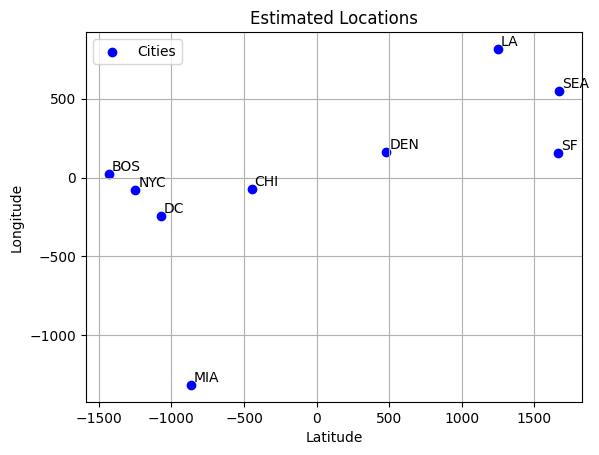

In [69]:
plt.scatter(locs[:, 0], locs[:, 1], c='blue', marker='o', label='Cities')
for i, txt in enumerate(cities):
    plt.annotate(txt, (locs[i, 0] + 20, locs[i, 1] + 20))

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Estimated Locations')
plt.legend()
plt.grid()
plt.show()

## (iii) 
### After multiple run, I found most of the time I need to rotated the graph either horizontally or vertically to fit the north, south, east, and west direction. After rotation, the estimated location makes sense in real life. Western cities are located on the west coast and Eastern cities are located on the east coast.  The north to south sequence of the cities also makes sense. However, the relative location may not be that accurate. For example, in my first run, Chicago should be more north than NY in real life but in my graph it is on the west of NY. This can be explained that the earth is round and our axis are longitude and latitude. 

# 2 Kernelized SVM vs Neural Networks: Theory and Empirics

## (i) To get a feel for the data, create scatter plots (x vs. y) using 50 training samples and 1000 training samples for each function complexity. (There are a total of 10 plots.)

In [78]:
root_folder_path = '/ksvm_nn_data'
train_list = []
test_list = []
i =0 
for folder_path, subfolders, files in os.walk(root_folder_path):
    for file in files:  
        if file.endswith('train.csv'):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            train_list.append(df)
        if file.endswith('test.csv'):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            test_list.append(df)

In [79]:
random_50_train_list =  [ train.iloc[:50,:] for train in train_list ]
num_subplots = len(random_50_train_list)
fig, axes = plt.subplots(2, num_subplots, figsize=(15, 5), sharey=True)
for i in range(num_subplots):
    axes[0,i].scatter(random_50_train_list[i]['x'], random_50_train_list[i]['y'])
    axes[0,i].set_xlabel('X-axis label')
    axes[0,i].set_ylabel('Y-axis label')
    axes[0,i].set_title(f'50 - Scatter plot of x vs y (index {i})')
for i in range(num_subplots):
    axes[1,i].scatter(train_list[i]['x'], train_list[i]['y'])
    axes[1,i].set_xlabel('X-axis label')
    axes[1,i].set_ylabel('Y-axis label')
    axes[1,i].set_title(f'50 - Scatter plot of x vs y (index {i})')     
plt.tight_layout()
plt.show()

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1500x500 with 0 Axes>